In [63]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
data = pd.read_csv(Path("C:/Users/ritvi/Downloads/Merged Monthly Data.csv"), index_col="Period", infer_datetime_format=True, parse_dates=True)

In [11]:
data.head()

,Unnamed: 0,Canadian Dollar ($CADUSD) - Rate Value,CAN CPI,US CPI,CAN Foreign Reserves,US Foreign Reserves,Foreign Reserves Difference,Foreign Reserves Difference Percentage,CPI Difference,CPI Difference Percentage
Period,,,,,,,,,,
1971-01-01,0,1.011429,0.99,5.29,3.04,0.49,2.55,-0.838816,-4.30,4.343434
1971-02-01,1,1.009286,1.49,5.00,3.09,0.33,2.76,-0.893204,-3.51,2.355705
1971-03-01,2,1.007742,1.49,4.71,3.17,0.26,2.91,-0.917981,-3.22,2.161074
1971-04-01,3,1.010000,1.97,4.16,3.18,0.26,2.92,-0.918239,-2.19,1.111675
1971-05-01,4,1.010000,1.97,4.40,3.22,0.32,2.90,-0.900621,-2.43,1.233503


In [17]:
X = data[['CAN CPI', 'US CPI', 'Foreign Reserves Difference','CPI Difference']]
y = data['Canadian Dollar ($CADUSD) - Rate Value']

In [18]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# train random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=980)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=980)

In [21]:
# make predictions
y_pred = rf.predict(X_test)

In [22]:
# calculate R-squared
r2 = r2_score(y_test, y_pred)

In [24]:
# determine recommendation based on predicted value
last_price = data.iloc[-1]['Canadian Dollar ($CADUSD) - Rate Value']
predicted_price = rf.predict(X.iloc[[-1]][['CAN CPI', 'US CPI', 'Foreign Reserves Difference','CPI Difference']])[0]

if predicted_price > last_price:
    recommendation = 'BUY'
else:
    recommendation = 'SELL'

In [25]:
# print recommendation and R-squared
print('Recommendation:', recommendation)
print('R-squared:', r2)

Recommendation: SELL
R-squared: 0.7450959533835854


<b> Utilizing Gradient Boosting </b>

In [36]:
# Create a Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=980)

In [37]:
# Fit the model to the training data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=980)

In [38]:
# Predict the exchange rate for the testing data
y_pred = gbr.predict(X_test)

In [39]:
# Evaluate the performance of the model using Mean Squared Error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

Mean Squared Error:  0.0070645942129340345
R^2 Score:  0.715685461191457


In [40]:
# Predict the exchange rate for the next 3 months
next_3_months = X[-3:]
future_predictions = gbr.predict(next_3_months)
print("Predictions for next 3 months: ", future_predictions)

Predictions for next 3 months:  [1.33128309 1.3311166  1.32626804]


<b> Utilizing Neural Networks </b>

In [41]:
# split data into training and testing sets
train_size = int(len(X) * 0.8)
train_features, test_features = X[:train_size], X[train_size:]
train_target, test_target = y[:train_size], y[train_size:]

In [42]:
# create neural network model
model = MLPRegressor(hidden_layer_sizes=(100,50), max_iter=500, solver='adam', activation='relu', random_state=980)

In [43]:
# train the model
model.fit(train_features, train_target)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=980)

In [44]:
# make predictions
train_predictions = model.predict(train_features)
test_predictions = model.predict(test_features)

In [45]:
# calculate performance metrics
train_rmse = np.sqrt(mean_squared_error(train_target, train_predictions))
train_r2 = r2_score(train_target, train_predictions)
test_rmse = np.sqrt(mean_squared_error(test_target, test_predictions))
test_r2 = r2_score(test_target, test_predictions)

In [46]:
# print performance metrics
print("Train RMSE: ", train_rmse)
print("Train R2 Score: ", train_r2)
print("Test RMSE: ", test_rmse)
print("Test R2 Score: ", test_r2)

Train RMSE:  0.1176913882299294
Train R2 Score:  0.5230632265577636
Test RMSE:  1.7119031470234805
Test R2 Score:  -224.42244967528546


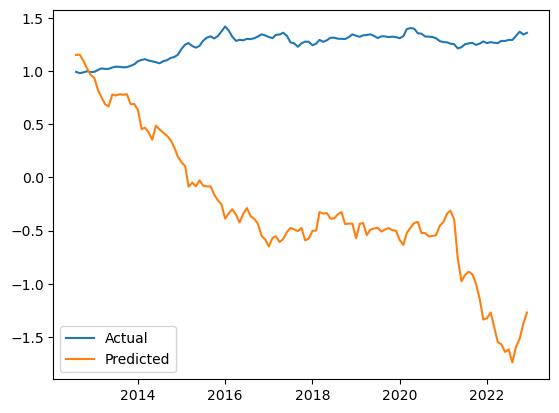

In [47]:
# plot actual vs predicted values for Neural Networks
plt.plot(test_target.index, test_target.values, label="Actual")
plt.plot(test_target.index, test_predictions, label="Predicted")
plt.legend()
plt.show()

<b> Support Vector Machines </b>

In [50]:
# Train the SVM model
svm = SVR(kernel='linear', C=1.0, epsilon=0.1)
svm.fit(X_train, y_train)

SVR(kernel='linear')

In [51]:
# Make predictions on the test data
y_pred = svm.predict(X_test)

In [52]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('R^2: ', r2)

MSE:  0.020642543831740013
RMSE:  0.1436751329623189
R^2:  0.16924098505031904


<b> K-Nearest Neighbours </b>

In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=980)

In [57]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# Train the KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [59]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

In [60]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('R^2:', r2)

MSE: 0.00694122886527075
R^2: 0.6966678452276438


<b> Working all the models together to evaluate the best model </b>

In [61]:
# Initialize models
rf_model = RandomForestRegressor(random_state=980)
gb_model = GradientBoostingRegressor(random_state=980)
nn_model = MLPRegressor(random_state=980)
svm_model = SVR()
knn_model = KNeighborsRegressor()

models = [('Random Forest', rf_model), ('Gradient Boosting', gb_model), 
          ('Neural Networks', nn_model), ('Support Vector Machines', svm_model), 
          ('K-Nearest Neighbors', knn_model)]

In [64]:
# Train and evaluate models
for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R-squared:', r2_score(y_test, y_pred))
    print('\n')

Random Forest
MAE: 0.046286157376979754
MSE: 0.00512069504495962
RMSE: 0.07155903188948003
R-squared: 0.7762252920817441


Gradient Boosting
MAE: 0.057327227027934524
MSE: 0.007528762710918923
RMSE: 0.08676844305920743
R-squared: 0.6709925777985819


Neural Networks
MAE: 0.10296011396846022
MSE: 0.0180485984910162
RMSE: 0.13434507244784305
R-squared: 0.21127506711486388


Support Vector Machines
MAE: 0.0842874580605274
MSE: 0.014430266615133509
RMSE: 0.12012604469944688
R-squared: 0.36939640641897964


K-Nearest Neighbors
MAE: 0.05352239961862389
MSE: 0.00694122886527075
RMSE: 0.08331403762434485
R-squared: 0.6966678452276438




From the above models, R-squared is the highest with Random Forest, so it is best to Utilize Random Forest. Other metrics such as MAE, MSE, and RMSE are also lower with Random Forest in comparison to other models.